In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS

In [4]:
ratings = pd.read_csv('/content/drive/MyDrive/NEU/DMT/project/rating.csv')
anime = pd.read_csv('/content/drive/MyDrive/NEU/DMT/project/anime.csv')

In [5]:
ratings.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [6]:
ratings = ratings.rename(columns={'rating': 'user_rating'})
ratings.head()

,user_id,anime_id,user_rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


# **Performing EDA to get insights in data:**

In [8]:
anime['type'].value_counts()

TV         3787
OVA        3311
Movie      2348
Special    1676
ONA         659
Music       488
Name: type, dtype: int64

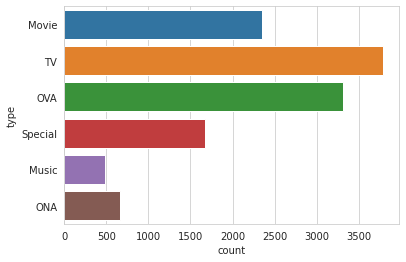

In [11]:
sns.countplot(y="type", data=anime)

In [20]:
fig = px.pie(anime, values=anime['type'].value_counts().values, names=anime['type'].value_counts().index, title='Anime Type',width=500, height=500)
fig.show()

In [9]:
combined_data = anime.merge(ratings, how='left', on='anime_id')
combined_data.shape

(7814824, 9)

In [10]:
combined_data.head()

,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99.0,5.0
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152.0,10.0
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244.0,10.0
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271.0,10.0
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278.0,-1.0


Anime with highest reviews:

In [13]:
most_reviewed = combined_data.groupby('name')['user_id'].count().sort_values(ascending=False).head(15).reset_index()
most_reviewed

,name,user_id
0,Death Note,39340
1,Sword Art Online,30583
2,Shingeki no Kyojin,29584
3,Code Geass: Hangyaku no Lelouch,27718
4,Elfen Lied,27506
5,Angel Beats!,27183
6,Naruto,25925
7,Fullmetal Alchemist,25032
8,Fullmetal Alchemist: Brotherhood,24574
9,Toradora!,24283


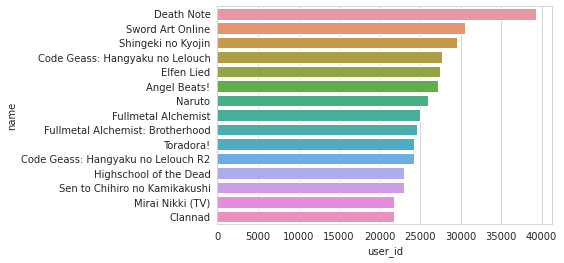

In [16]:
sns.barplot(y='name', x="user_id", data=most_reviewed);

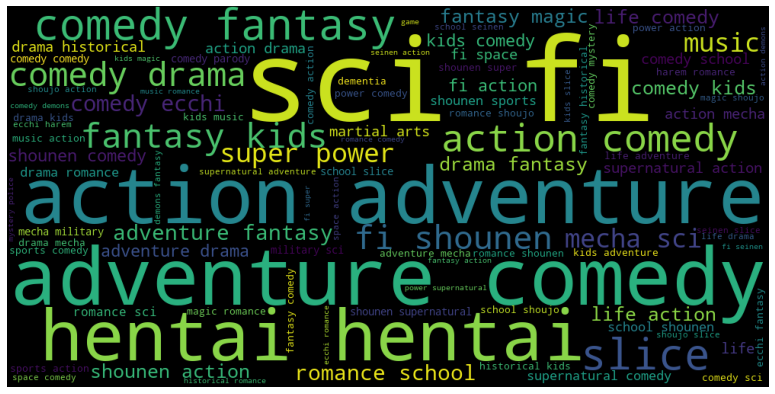

In [32]:
categories = ''
stopwords = set(STOPWORDS)
for val in anime['genre']:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    categories += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 1000, height = 500, stopwords = stopwords, min_font_size = 10).generate(categories)
                    
plt.figure(figsize = (14, 7))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()